In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('file_3.xlsx')


data['time'] = pd.to_datetime(data['time'])

print(data.head())
print(data.info())


        time        mode    percents
0 2019-12-01  MasterCard   55.555556
1 2019-12-01        Visa   80.000000
2 2020-01-01  MasterCard  100.000000
3 2020-01-01        Visa   66.666667
4 2020-01-01         МИР  100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      112 non-null    datetime64[ns]
 1   mode      112 non-null    object        
 2   percents  112 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ KB
None


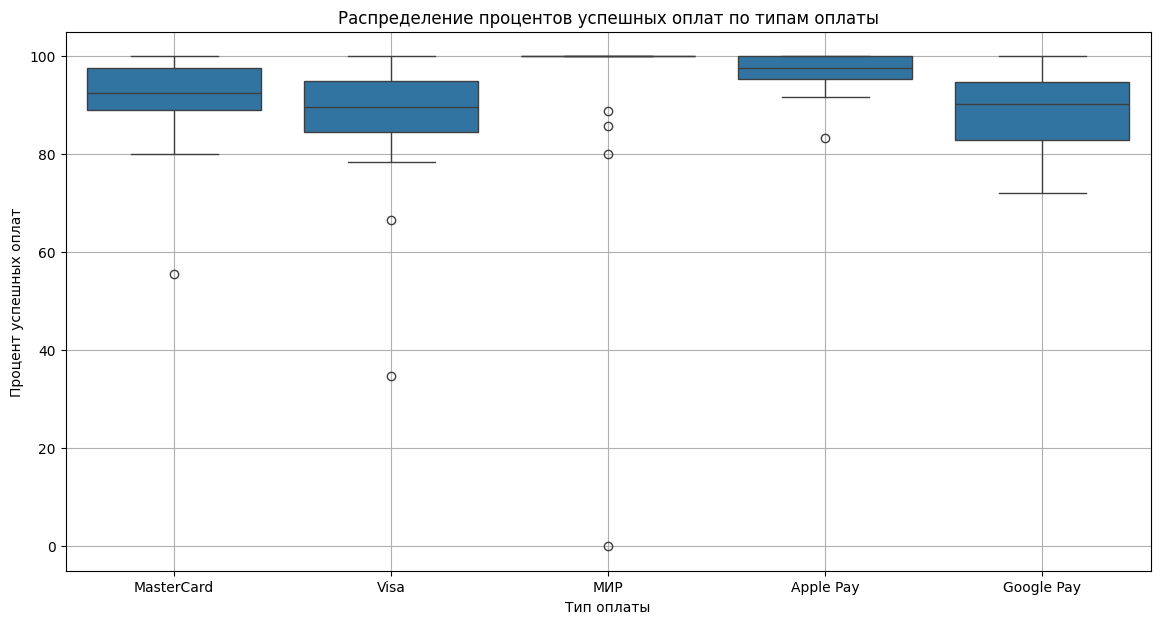

In [14]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='mode', y='percents')
plt.title('Распределение процентов успешных оплат по типам оплаты')
plt.xlabel('Тип оплаты')
plt.ylabel('Процент успешных оплат')
plt.grid(True)
plt.show()

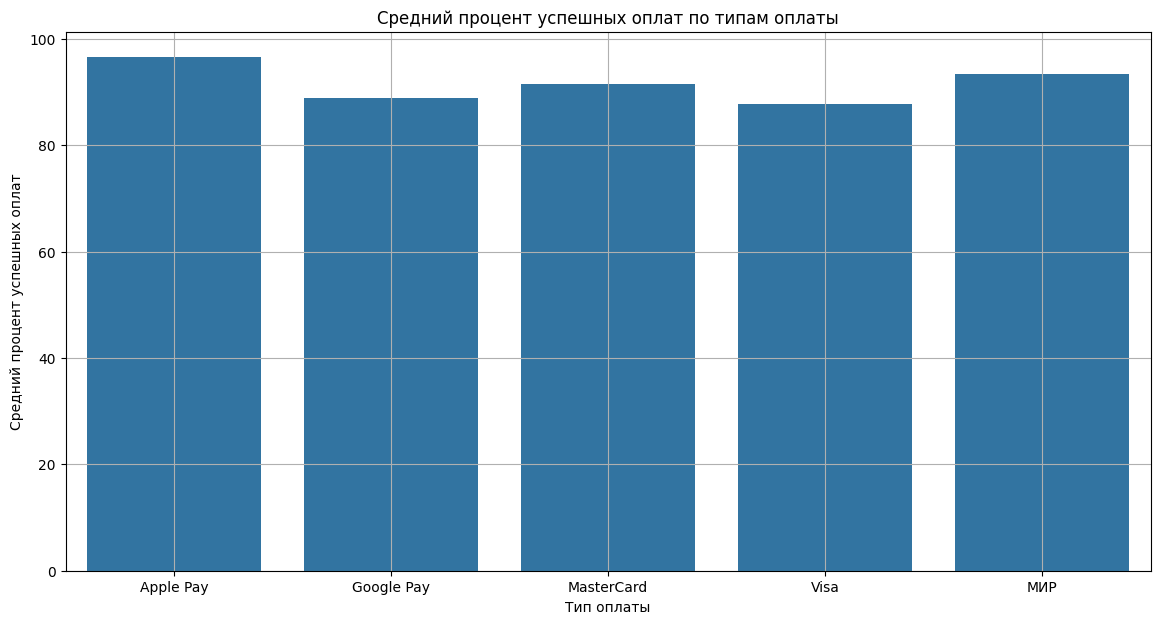

In [22]:
mean_percents = data.groupby('mode')['percents'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=mean_percents, x='mode', y='percents')
plt.title('Средний процент успешных оплат по типам оплаты')
plt.xlabel('Тип оплаты')
plt.ylabel('Средний процент успешных оплат')
plt.grid(True)
plt.show()


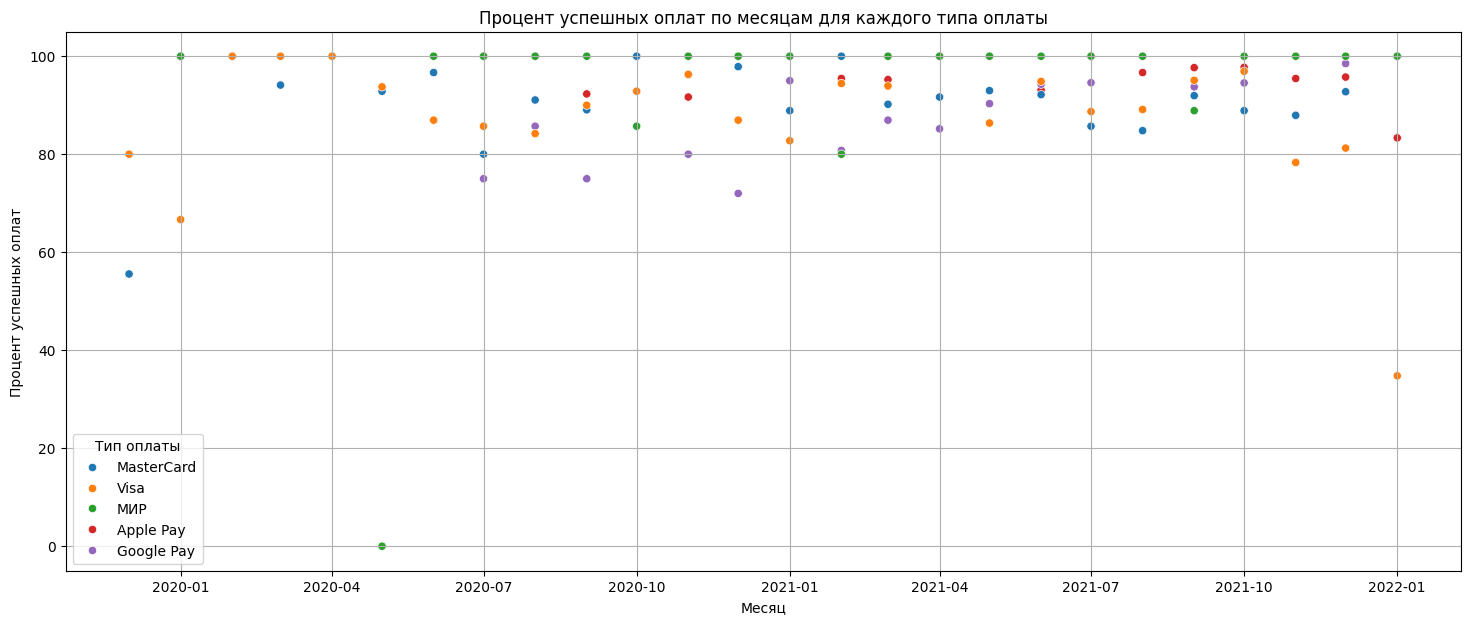

In [2]:
plt.figure(figsize=(18, 7))
sns.scatterplot(data=data, x='time', y='percents', hue='mode')
plt.title('Процент успешных оплат по месяцам для каждого типа оплаты')
plt.xlabel('Месяц')
plt.ylabel('Процент успешных оплат')
plt.legend(title='Тип оплаты')
plt.grid(True)
plt.show()


По boxplot'у можно заметить, что наиболее стабильной системой является система **МИР** у которой выплаты происходят почти всегда со 100% вероятностью(Межквартильный размах узкий и находиться на 100%) за исключением выбросов, которые, возможно срабатывали из-за проблем с сервером или чем-то еще на что нельзя дать ответ без более глубокого анализа. Однако у системы **МИР** был месяц, когда процент успешной оплаты был равен 0, из-за чего имеет смысл рассмотреть **Apple Pay** как систему у которой высокая медиана (идет второй после отечесвенной системы), узкий межквартильный размах, который как раз свидетельствует о том, что в основном успех оплаты находится близко к 100%, а также нет критичных выбросов (а те, что есть в пределах нормы, относительно других систем). Также за использование **МИР'а** и **Appple Pay** говорит график со средними значениями, где Apple стоит на первом месте, а МИР на втором. По точечному графику, можно более детально разброс значений у разных систем. Если говорить про худшие платежные системы, то гистаграмма со средним количеством успешных платежей и точечный график показывают, что худшие платежные системы - **Visa** и **Google Pay**

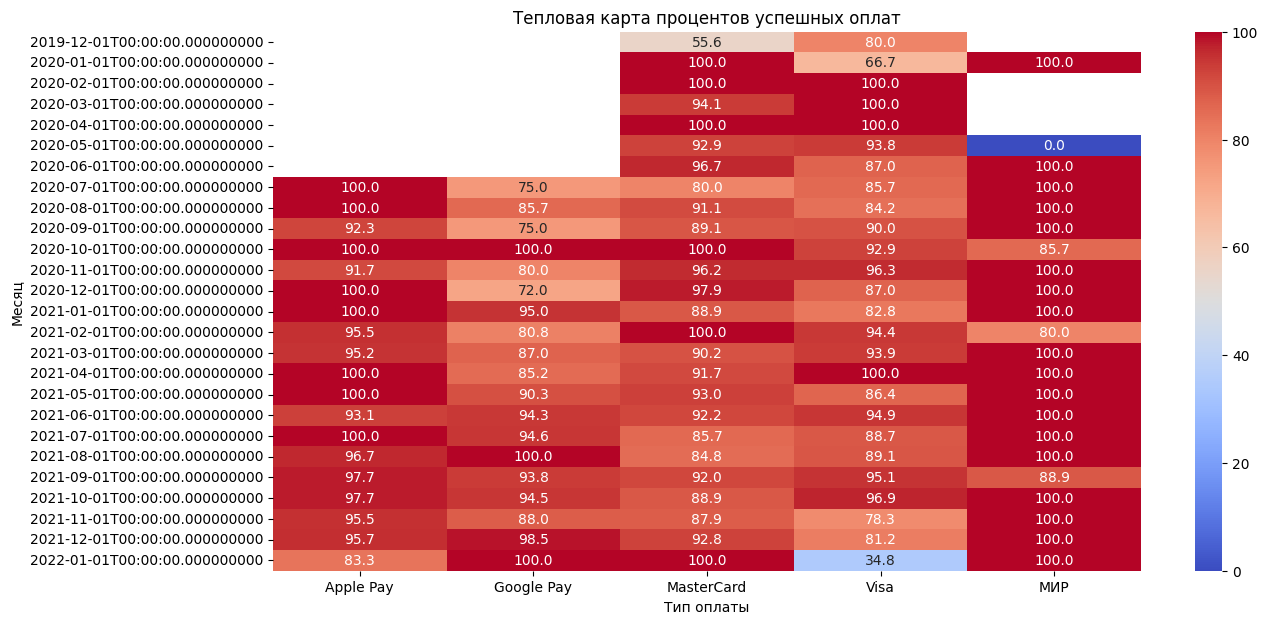

In [25]:
heatmap_data = data.pivot_table(index='time', columns='mode', values='percents')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Тепловая карта процентов успешных оплат')
plt.xlabel('Тип оплаты')
plt.ylabel('Месяц')
plt.show()


Тепловая карта снова показывет, что **МИР** и **Apple Pay** являются лучшими платежными системами. Однако тепловая карта более наглядно показывает, что у Apple Pay и Google наименьшее количество данных по месяцам, но также и у МИР были некоторые месяцы выпадающие из статистики.

Резюмируя, можно сказать, что в топ систем для оплат входят **МИР** и **Apple Pay**, так как у них самое высокое среднее количество успешеных оплат, а также наивысшая медиана успешных оплат среди всех видов платежных систем.


*Стоит отметить, что у отечественной системы оплаты **МИР** есть аномалия, когда процент успешных оплат падал до 0, что стоит изучить подробнее, чтобы понимать все риски использования этой платежной системы. Также стоит учитывать, что у обеих этих систем были периоды, когда статистика по оплате не велась*